In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import mean_squared_error
from keras.layers import LSTM, Dense
from keras.models import Sequential
import math
plt.rcParams.update({'figure.figsize':(18,8),'figure.dpi':100})

Using TensorFlow backend.


In [2]:
df=pd.read_csv('datasets/iig_maitri.csv')
# print(df)
df=df[df.tempr>-100]
ds=df.tempr
# print(ds)
ds=ds.values
# print(ds)

In [3]:
model=Sequential()
model.add(LSTM(8,input_shape=(24, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
ds_temp2=np.reshape(ds, (ds.shape[0], 1, 1))
print(ds_temp2.shape)
ds_train=ds[:int(0.8*ds_temp2.shape[0])]
ds_test=ds[int(0.8*ds_temp2.shape[0]):]

Instructions for updating:
Colocations handled automatically by placer.
(31335, 1, 1)


In [4]:
def create_dataset(dataset, look_back=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)):
        end_ix=i+look_back
        if end_ix>len(dataset)-1:
            break
        seqx, seqy= dataset[i:end_ix],dataset[end_ix]
        dataX.append(seqx)
        dataY.append(seqy)
    return np.array(dataX),np.array(dataY)

# look_back=1
trainX, trainY=create_dataset(ds_train, 24)
# print(trainX.shape)
X=np.array(trainX).reshape(trainX.shape[0],trainX.shape[1], 1)
print(X.shape)

Y=np.array(trainY)
Y=np.reshape(Y,(Y.shape[0],1))
print(Y.shape)

(25044, 24, 1)
(25044, 1)


In [5]:

model.fit(X, Y, epochs=5, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
25044/25044 [==============================] - 50s 2ms/step - loss: 79.1069
Epoch 2/5
25044/25044 [==============================] - 40s 2ms/step - loss: 27.1255
Epoch 3/5
25044/25044 [==============================] - 40s 2ms/step - loss: 12.3322
Epoch 4/5
25044/25044 [==============================] - 40s 2ms/step - loss: 6.0969
Epoch 5/5
25044/25044 [==============================] - 42s 2ms/step - loss: 3.2269


In [6]:
temp_values=ds_train
predictions=[]
predictions=np.array(predictions)
for i in range(ds_test.size):
    x_input=temp_values[-365*24:]
    x_input=x_input.reshape(365,24,1)
    yhat=model.predict(x_input, verbose=1)
    temp_values=np.append(temp_values,yhat[0])
    predictions=np.append(predictions, yhat[0])
# plt.ylim(-200,10)

365/365 [==============================] - 0s 146us/step


365/365 [==============================] - 0s 182us/step


365/365 [==============================] - 0s 206us/step


365/365 [==============================] - 0s 156us/step


365/365 [==============================] - 0s 170us/step


365/365 [==============================] - 0s 176us/step


365/365 [==============================] - 0s 207us/step


365/365 [==============================] - 0s 162us/step


365/365 [==============================] - 0s 150us/step


365/365 [==============================] - 0s 192us/step


365/365 [==============================] - 0s 173us/step


365/365 [==============================] - 0s 182us/step


365/365 [==============================] - 0s 164us/step


365/365 [==============================] - 0s 195us/step


365/365 [==============================] - 0s 171us/step


365/365 [==============================] - 0s 156us/step


365/365 [==============================] - 0s 173us/step


365/365 [==============================] - 0s 200us/step


365/365 [==============================] - 0s 244us/step


365/365 [==============================] - 0s 192us/step


365/365 [==============================] - 0s 173us/step


365/365 [==============================] - 0s 170us/step


365/365 [==============================] - 0s 137us/step


365/365 [==============================] - 0s 214us/step


365/365 [==============================] - 0s 121us/step


365/365 [==============================] - 0s 124us/step


365/365 [==============================] - 0s 121us/step


365/365 [==============================] - 0s 124us/step


365/365 [==============================] - 0s 122us/step


365/365 [==============================] - 0s 109us/step


365/365 [==============================] - 0s 218us/step


365/365 [==============================] - 0s 172us/step


365/365 [==============================] - 0s 125us/step


365/365 [==============================] - 0s 110us/step


365/365 [==============================] - 0s 120us/step


365/365 [==============================] - 0s 111us/step


365/365 [==============================] - 0s 112us/step


365/365 [==============================] - 0s 107us/step


365/365 [==============================] - 0s 119us/step


365/365 [==============================] - 0s 132us/step


365/365 [==============================] - 0s 131us/step


365/365 [==============================] - 0s 116us/step


365/365 [==============================] - 0s 128us/step


365/365 [==============================] - 0s 124us/step


(5000, 35000)

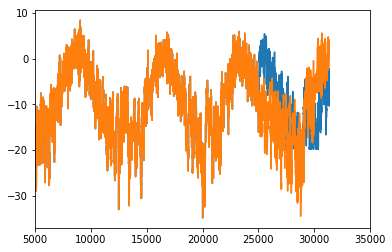

In [7]:

plt.plot(temp_values)
plt.plot(np.reshape(ds,(ds.shape[0],1)))
plt.xlim(5000,35000)

In [8]:

testScore=math.sqrt(mean_squared_error(ds_test.reshape(ds_test.shape[0]), predictions))
print(testScore)

9.10946131257655
